<a href="https://colab.research.google.com/github/sg758253/IDS/blob/main/HW6/Project6_problem1_p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Name: Sachin Gupta (sg758253@sju.edu)
* Date: 03/05/22
* Assignment: 6

In [ ]:
# import library
import pandas as pd
import numpy as np

In [ ]:
# import dataset
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

In [ ]:
# We will use Income as the target class in this exercise
adultDF.head()

age         workclass  education         marital-status         occupation  \
0   50  Self-emp-not-inc         13     Married-civ-spouse    Exec-managerial   
1   38           Private          9               Divorced  Handlers-cleaners   
2   49           Private          5  Married-spouse-absent      Other-service   
3   52  Self-emp-not-inc          9     Married-civ-spouse    Exec-managerial   
4   31           Private         14          Never-married     Prof-specialty   

      sex  capital-gain  capital-loss income  
0    Male             0             0  <=50K  
1    Male             0             0  <=50K  
2  Female             0             0  <=50K  
3    Male             0             0   >50K  
4  Female         14084             0   >50K

## **Training Data Preparation for Classification**


* For simplicity, only two predictors and the target are retained, as follows:

> * **Marital status**: a categorical predictor with classes married, divorced, never‐married, separated, and widowed.
> * **Cap_gains_losses**: a numerical predictor, equal to **capital gains + |capital losses|**.
> * **Income**: a categorical target variable with two classes >50k and ≤50k

In [ ]:
# Create a new predictor
adultDF['capital-gains-losses'] = adultDF['capital-gain'] + abs(adultDF['capital-loss'])


# Create a new dataframe for the classification task with only three columns: two predictors and a target
new_adultDF = adultDF.filter(['marital-status','capital-gains-losses','income'], axis=1)

new_adultDF.head(10)


marital-status  capital-gains-losses income
0     Married-civ-spouse                     0  <=50K
1               Divorced                     0  <=50K
2  Married-spouse-absent                     0  <=50K
3     Married-civ-spouse                     0   >50K
4          Never-married                 14084   >50K
5     Married-civ-spouse                     0   >50K
6     Married-civ-spouse                     0  <=50K
7     Married-civ-spouse                  2042  <=50K
8     Married-civ-spouse                     0   >50K
9               Divorced                     0  <=50K

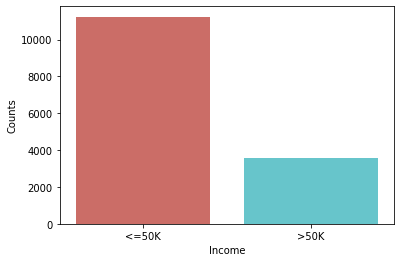

In [ ]:
# Examine target class distrbutions

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='income', data=new_adultDF, palette = 'hls')
plt.xlabel('Income')
plt.ylabel('Counts')
plt.show()



In [ ]:
# We now need to encode the categoric columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# save the encoded dataframe here
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes (if any)
for i in range(0, new_adultDF.shape[1]):
    if new_adultDF.dtypes[i]=='object' or new_adultDF.dtypes[i]=='bool':
        encoded_adultDF[new_adultDF.columns[i]] = le.fit_transform(new_adultDF[new_adultDF.columns[i]])
    else:
        encoded_adultDF[new_adultDF.columns[i]] = new_adultDF[new_adultDF.columns[i]]
        
encoded_adultDF.head(10)


marital-status  capital-gains-losses  income
0               2                     0       0
1               0                     0       0
2               3                     0       0
3               2                     0       1
4               4                 14084       1
5               2                     0       1
6               2                     0       0
7               2                  2042       0
8               2                     0       1
9               0                     0       0

# **Train_Test_Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Prepare X and y
X = encoded_adultDF.filter(['marital-status','capital-gains-losses'], axis=1)
y = encoded_adultDF['income']


# Let's do an 80-20 split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 2)
Test size: (2960, 2)


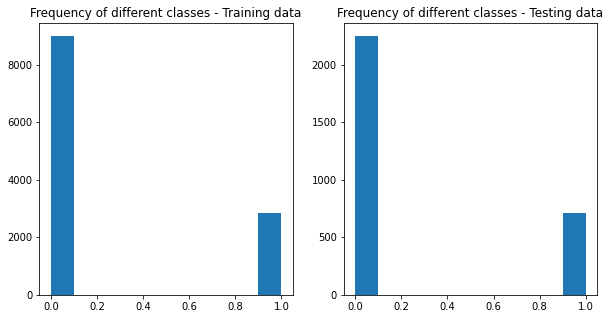

In [ ]:
# Find out class distributions in training and test datasets.

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y_test);
plt.title('Frequency of different classes - Testing data');



# **Training, Plotting, and Printing Decision Trees**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cn = ['low_income', 'hi_income']

#1 Creating function makeDTModel

In [ ]:
def makeDTModel(criterion, X_train, y_train,max_depth=None,max_leaf_nodes=None):
  dts1 = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                max_leaf_nodes=max_leaf_nodes,random_state = 120)
  dts1.fit(X_train,y_train)
  return dts1

#2 Creating function displayTree

In [ ]:
# display text and graphic representation of a tree classifier
def displayTree(classifier, X):
  tree.plot_tree(classifier, feature_names=X.columns.values.tolist(), 
                                class_names=cn,
                                filled = True)




#3 Creating function displayCM

In [ ]:
# display text and heatmap of a confusion matrix
def displayCM(classifier, X_train, y_train, X_test, y_test):
  predictions = classifier.predict(X_test)
  cm = confusion_matrix(y_true=y_test, y_pred = predictions)
  print(cm)
  
  sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Cart classifier1")


#4 Creating function compareModels

In [ ]:
# create and display plots of side-by-side model comparisons
def compareModels(cart_classifier, c5_classifier):
  labels = ['CART', 'C5.0']

  # Record CART's classification accuracy on tarining and test datasets
  cart_train_score1 = round(cart_classifier.score(X_train, y_train), 2) # training score
  cart_test_score1 = round(cart_classifier.score(X_test, y_test), 2)   # testing score

  print ("CART Training and Testing scores: %.2f, %.2f" %  (cart_train_score1, cart_test_score1))


  # Record C5's classification accuracy on tarining and test datasets
  c5_train_score1 = round(c5_classifier1.score(X_train, y_train), 2) # training score
  c5_test_score1 = round(c5_classifier1.score(X_test, y_test), 2)   # testing score

  print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (c5_train_score1, c5_test_score1))


  training_scores = [cart_train_score1, c5_train_score1]
  testing_scores =  [cart_test_score1, c5_test_score1]

  x = np.arange(2)  # the label locations
  width = 0.35  # the width of the bars

  fig, ax = plt.subplots()
  rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
  rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Model Accuracy')
  ax.set_xticks(x)
  ax.set_ylim(0,1)
  ax.set_xticklabels(labels)
  ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

  plt.title('Model Comparisons')
  plt.show()

#Creating 4 model with different max_depth and different max_leaf nodes

In [ ]:
# Taking max_depth=2 and max_leaf_nodes=3
cart_classifier1 = makeDTModel("gini", X_train, y_train,2,3)
c5_classifier1 = makeDTModel("entropy", X_train, y_train,2,3)

# Taking max_depth=3 and max_leaf_nodes=4
cart_classifier2 = makeDTModel("gini", X_train, y_train,3,4)
c5_classifier2 = makeDTModel("entropy", X_train, y_train,3,4)

# Taking max_depth=4 and max_leaf_nodes=5
cart_classifier3 = makeDTModel("gini", X_train, y_train,4,5)
c5_classifier3 = makeDTModel("entropy", X_train, y_train,4,5)

# Taking max_depth=None and max_leaf_nodes=None
cart_classifier4 = makeDTModel("gini", X_train, y_train)
c5_classifier4 = makeDTModel("entropy", X_train, y_train)

# **Model1: Display tree, cm and accuracy score for cart_classifier1 and c5_classifier1**

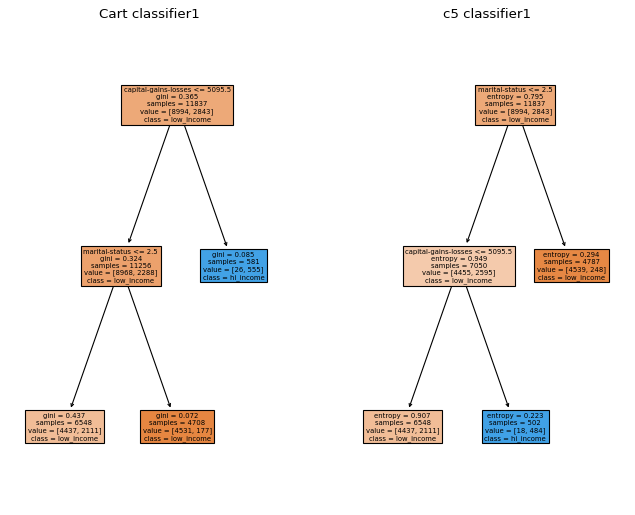

In [ ]:
# Display tree for cart_classifier1

plt.figure(figsize=(10, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier1, X)
plt.title("Cart classifier1")

# Display tree for c5_classifier1
plt.subplot(1,2,2)
displayTree(c5_classifier1, X)
plt.title("c5 classifier1")
plt.show()

-------cart-------
[[2238   11]
 [ 583  128]]
-------c5-------
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier1')

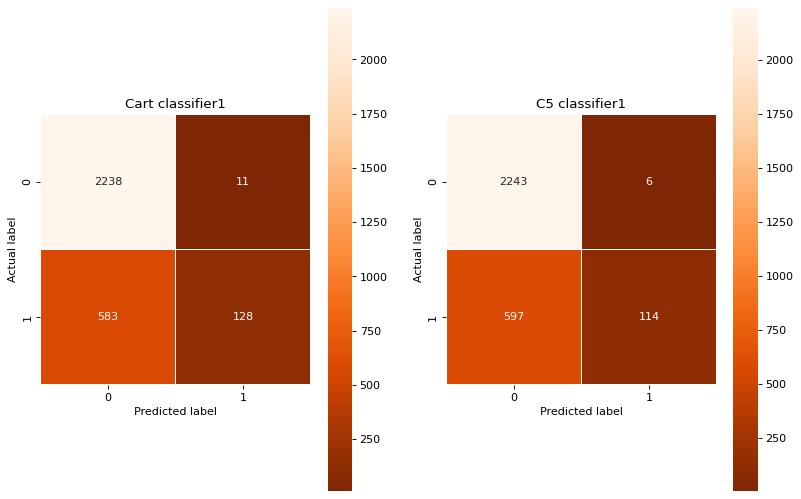

In [ ]:
# Display CM for cart_classifier2
plt.figure(figsize=(12, 8), dpi=80)

print('-------cart-------')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier1, X_train, y_train, X_test, y_test)
plt.title("Cart classifier1")

# Display CM for c5_classifier2
print('-------c5-------')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier1, X_train, y_train, X_test, y_test)
plt.title("C5 classifier1")

CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


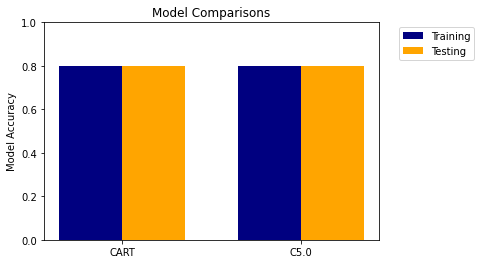

In [ ]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier1 and c5_classifier1
compareModels(cart_classifier1, c5_classifier1)

With max depth=2 and max leaf node=3, we were able to achieve an accuracy of 80% for the cart and c5 models.

# **Model2: Display tree, cm and accuracy score for cart_classifier2 and c5_classifier2**

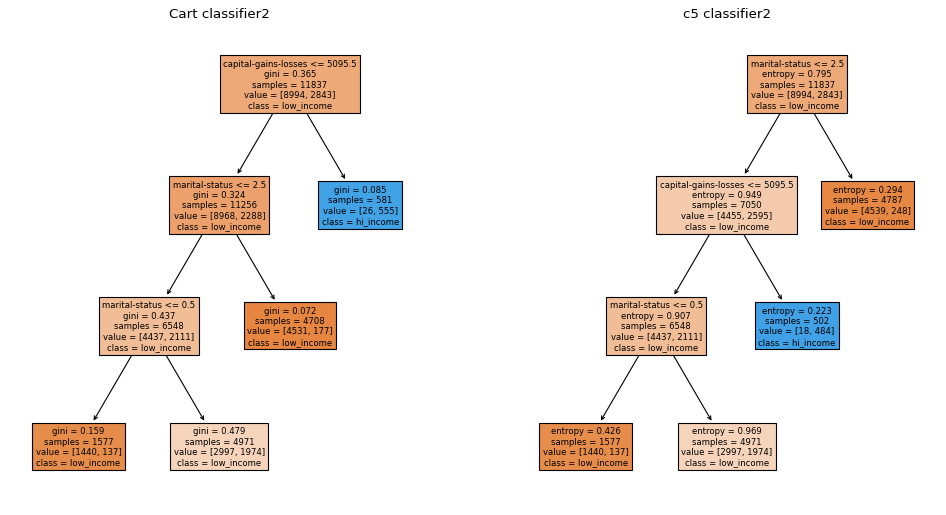

In [ ]:
# Display tree for cart_classifier2

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier2, X)
plt.title("Cart classifier2")

# Display tree for c5_classifier2
plt.subplot(1,2,2)
displayTree(c5_classifier2, X)
plt.title("c5 classifier2")
plt.show()

-------cart-------
[[2238   11]
 [ 583  128]]
-------c5-------
[[2243    6]
 [ 597  114]]


Text(0.5, 1.0, 'C5 classifier2')

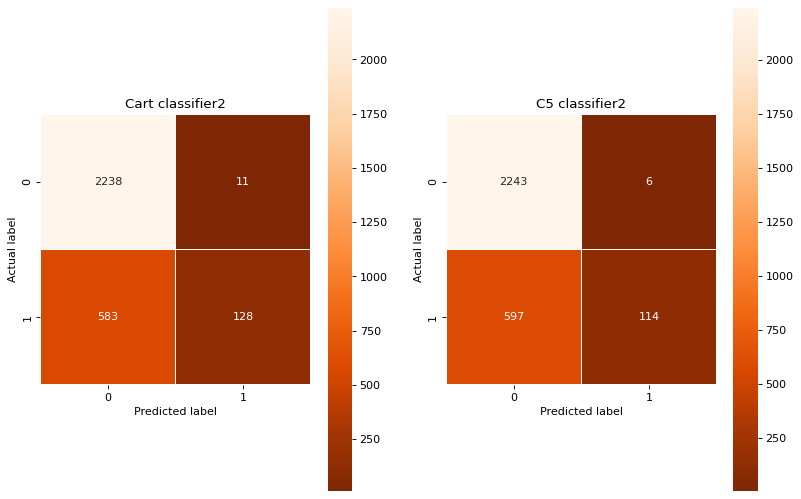

In [ ]:
# Display CM for cart_classifier2
plt.figure(figsize=(12, 8), dpi=80)

print('-------cart-------')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier2, X_train, y_train, X_test, y_test)
plt.title("Cart classifier2")

# Display CM for c5_classifier2
print('-------c5-------')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier2, X_train, y_train, X_test, y_test)
plt.title("C5 classifier2")


CART Training and Testing scores: 0.80, 0.80
C5.0 Training and Testing scores: 0.80, 0.80


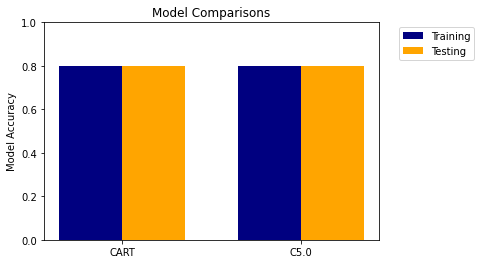

In [ ]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier2 and c5_classifier2
compareModels(cart_classifier2, c5_classifier2)

With max depth=3 and max leaf node=4, we were able to achieve an accuracy of 80% for the cart and c5 models.

# **Model3: Display tree, cm and accuracy score for cart_classifier3 and c5_classifier3**

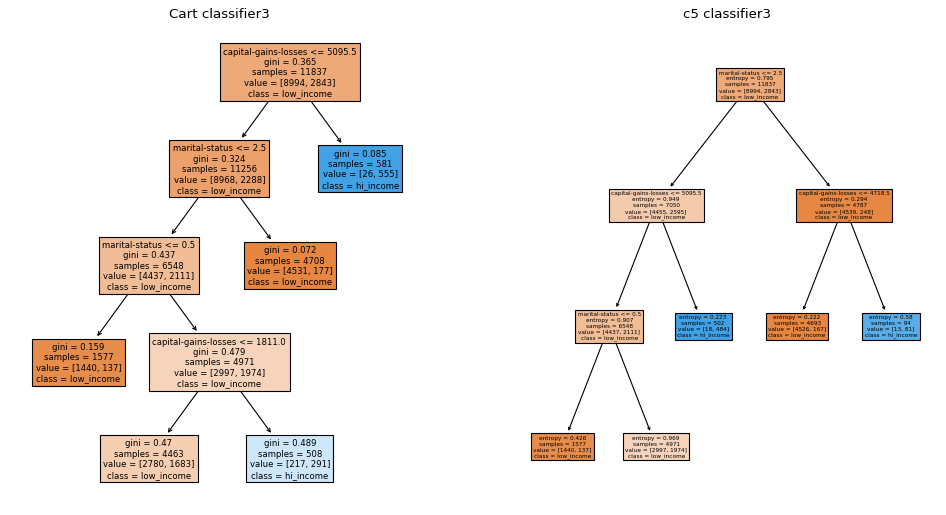

In [ ]:
# Display tree for cart_classifier3

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier3, X)
plt.title("Cart classifier3")

# Display tree for c5_classifier3
plt.subplot(1,2,2)
displayTree(c5_classifier3, X)
plt.title("c5 classifier3")
plt.show()

-------cart-------
[[2187   62]
 [ 511  200]]
-------c5-------
[[2235   14]
 [ 583  128]]


Text(0.5, 1.0, 'C5 classifier3')

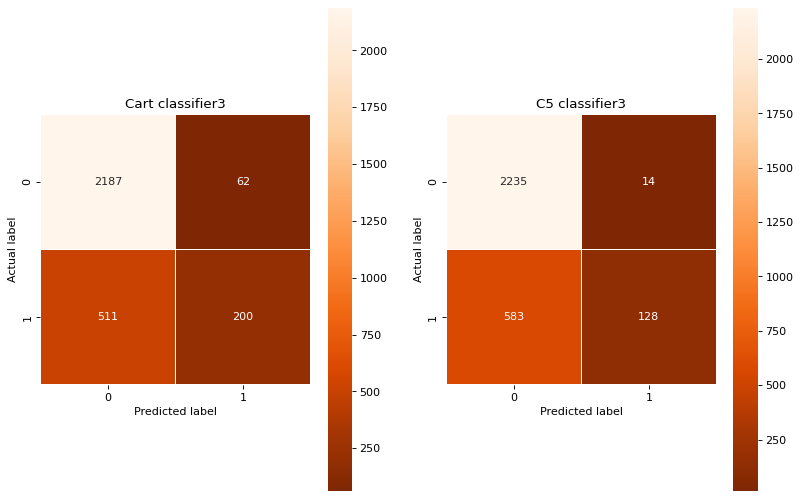

In [ ]:
# Display CM for cart_classifier3
plt.figure(figsize=(12, 8), dpi=80)

print('-------cart-------')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier3, X_train, y_train, X_test, y_test)
plt.title("Cart classifier3")

# Display CM for c5_classifier3
print('-------c5-------')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier3, X_train, y_train, X_test, y_test)
plt.title("C5 classifier3")


CART Training and Testing scores: 0.81, 0.81
C5.0 Training and Testing scores: 0.80, 0.80


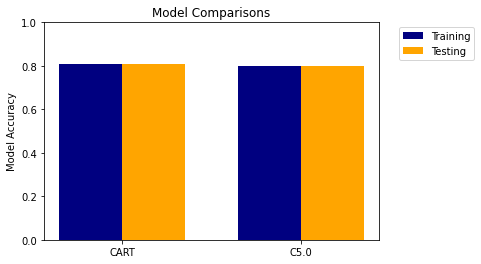

In [ ]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier3 and c5_classifier3
compareModels(cart_classifier3, c5_classifier3)


With max depth=4 and max leaf node=5, we were able to achieve an accuracy of 81% for the cart and 80% for the c5 models.

# **Model4: Display tree, cm and accuracy score for cart_classifier4 and c5_classifier4**

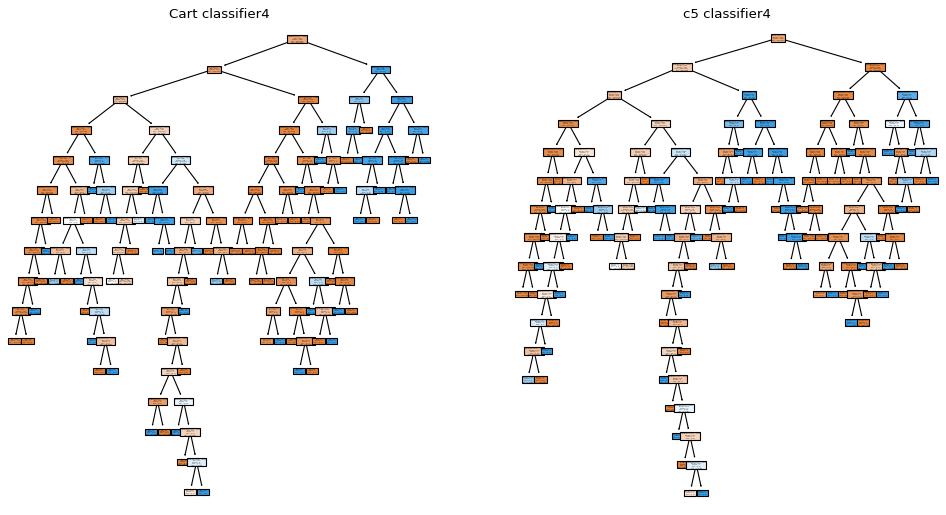

In [ ]:
# Display tree for cart_classifier4

plt.figure(figsize=(15, 8), dpi=80)
plt.subplot(1,2,1)
displayTree(cart_classifier4, X)
plt.title("Cart classifier4")

# Display tree for c5_classifier4
plt.subplot(1,2,2)
displayTree(c5_classifier4, X)
plt.title("c5 classifier4")
plt.show()

-------cart-------
[[2238   11]
 [ 502  209]]
-------c5-------
[[2237   12]
 [ 502  209]]


Text(0.5, 1.0, 'C5 classifier4')

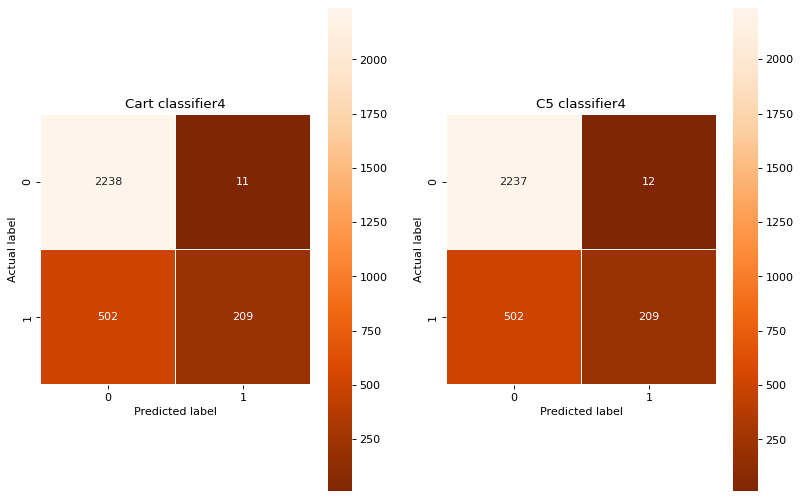

In [ ]:
# Display CM for cart_classifier4
plt.figure(figsize=(12, 8), dpi=80)

print('-------cart-------')
plt.subplot(1,2,1)
cart_cm1 = displayCM(cart_classifier4, X_train, y_train, X_test, y_test)
plt.title("Cart classifier4")

# Display CM for c5_classifier4
print('-------c5-------')
plt.subplot(1,2,2)
c5_cm1 = displayCM(c5_classifier4, X_train, y_train, X_test, y_test)
plt.title("C5 classifier4")

CART Training and Testing scores: 0.83, 0.83
C5.0 Training and Testing scores: 0.80, 0.80


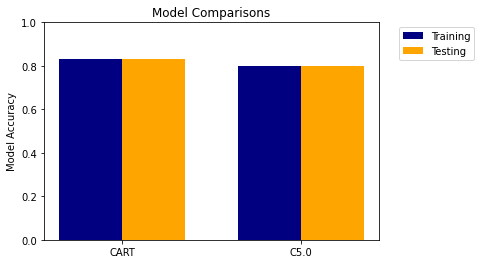

In [ ]:
# Accuracy Scores and plots for side-by-side model comparisons of cart_classifier4 and c5_classifier4
compareModels(cart_classifier4, c5_classifier4)

With max depth=None and max leaf node=None, we were able to achieve an accuracy of 83% with the cart model and 80% with the c5 models.

**Summary:**
We created 4 model for cart and 4 modelfor c5 strategy with varying max_depth and max_leaf_node, all of which had different accuracy. We discovered that changing the max depth and max leaf node values improves accuracy. We also discovered that the gini(cart) model has more accuracy than the entropy(c5) model.